In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# Create output directory for plots
os.makedirs('memory_analysis_plots', exist_ok=True)

# Load the CSV data
df = pd.read_csv('memory_parking_system.csv')

In [2]:
df['timestamp'] = pd.to_numeric(df['timestamp'])
df

,tag,timestamp,event,free_heap,min_free_heap,total_allocated_bytes,total_free_bytes,largest_free_block
0,MEMLOG,462,Before WiFi init,385084,384776,15388,385084,352256
1,MEMLOG,14942,After WiFi init,334292,331408,65572,334292,303104
2,MEMLOG,16082,Before HTTP request,334328,331408,65540,334328,303104
3,MEMLOG,16972,After HTTP request,333740,325588,66088,333740,303104
4,MEMLOG,17022,Before HTTP request,333740,325588,66088,333740,303104
5,MEMLOG,17552,After HTTP request,333284,325588,66536,333284,303104
6,MEMLOG,21662,Before HTTP request,333456,325588,66364,333456,303104
7,MEMLOG,22202,After HTTP request,333092,324936,66712,333092,303104
8,MEMLOG,26812,Before HTTP request,333244,324936,66572,333244,303104
9,MEMLOG,27212,After HTTP request,332880,324724,66920,332880,303104


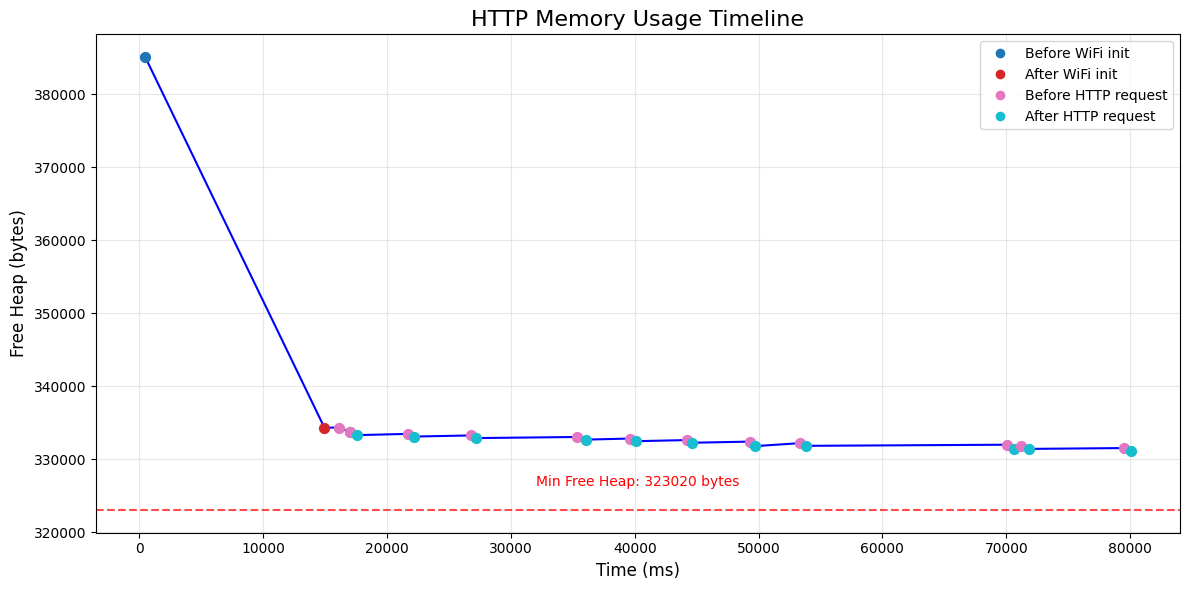

In [24]:
# 1. Memory Usage Timeline
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['free_heap'], marker='o', linestyle='-', color='blue')
plt.title('HTTP Memory Usage Timeline', fontsize=16)
plt.xlabel('Time (ms)', fontsize=12)
plt.ylabel('Free Heap (bytes)', fontsize=12)
plt.grid(True, alpha=0.3)

# Add event markers with different colors
events = df['event'].unique()
colors = plt.cm.tab10(np.linspace(0, 1, len(events)))
event_color_map = dict(zip(events, colors))

for idx, row in df.iterrows():
    plt.scatter(row['timestamp'], row['free_heap'], color=event_color_map[row['event']], s=50, zorder=3)

# Add a horizontal line for the minimum free heap
plt.axhline(y=df['min_free_heap'].min(), color='r', linestyle='--', alpha=0.7)
plt.text(df['timestamp'].max() * 0.4, df['min_free_heap'].min() * 1.01, 
        f"Min Free Heap: {df['min_free_heap'].min()} bytes", 
        color='r', fontsize=10)

# Add legend for event types
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', 
                             markerfacecolor=event_color_map[event], 
                             label=event, markersize=8) 
                  for event in events]
plt.legend(handles=legend_elements, loc='upper right')

plt.tight_layout()
plt.savefig('memory_analysis_plots/http_memory_timeline.png', dpi=300)
plt.show()

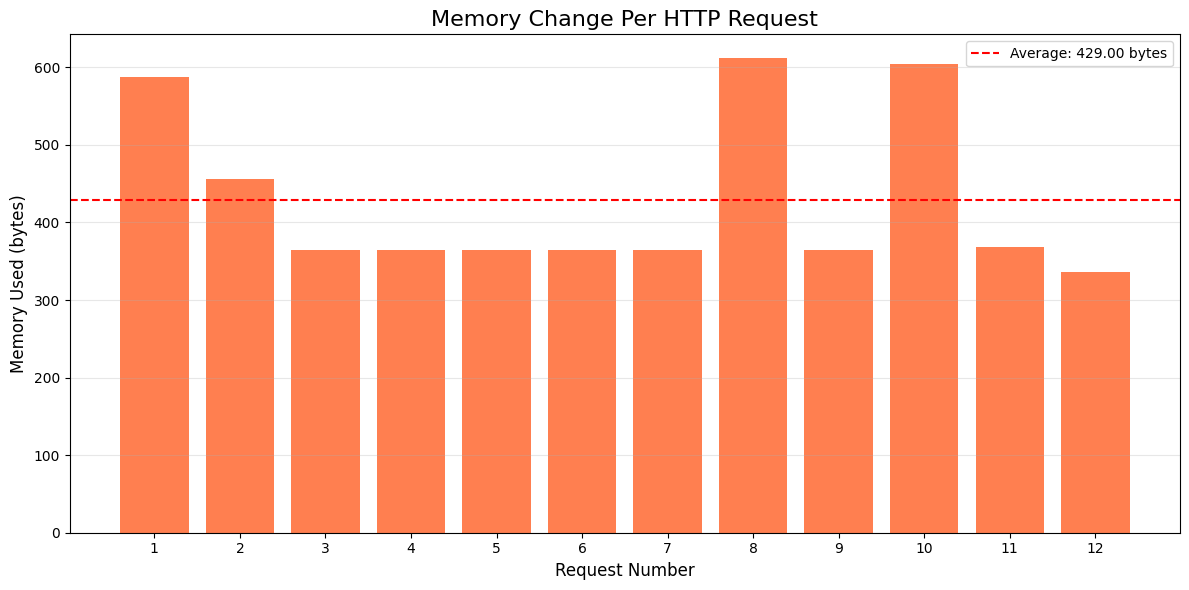

In [25]:
# 2. Memory Change Per HTTP Request
# Find rows with "Before HTTP request" events
before_http = df[df['event'] == 'Before HTTP request'].reset_index(drop=True)
# Find rows with "After HTTP request" events
after_http = df[df['event'] == 'After HTTP request'].reset_index(drop=True)

# Make sure we have equal number of before and after events
min_len = min(len(before_http), len(after_http))
before_http = before_http.iloc[:min_len]
after_http = after_http.iloc[:min_len]

# Calculate memory change for each HTTP request
memory_change = before_http['free_heap'].values - after_http['free_heap'].values
request_number = range(1, min_len + 1)

plt.figure(figsize=(12, 6))
plt.bar(request_number, memory_change, color='coral')
plt.axhline(y=np.mean(memory_change), color='red', linestyle='--', label=f'Average: {np.mean(memory_change):.2f} bytes')
plt.title('Memory Change Per HTTP Request', fontsize=16)
plt.xlabel('Request Number', fontsize=12)
plt.ylabel('Memory Used (bytes)', fontsize=12)
plt.grid(True, axis='y', alpha=0.3)
plt.legend()
plt.xticks(request_number)
plt.tight_layout()
plt.savefig('memory_analysis_plots/http_memory_change_per_request.png', dpi=300)
plt.show()

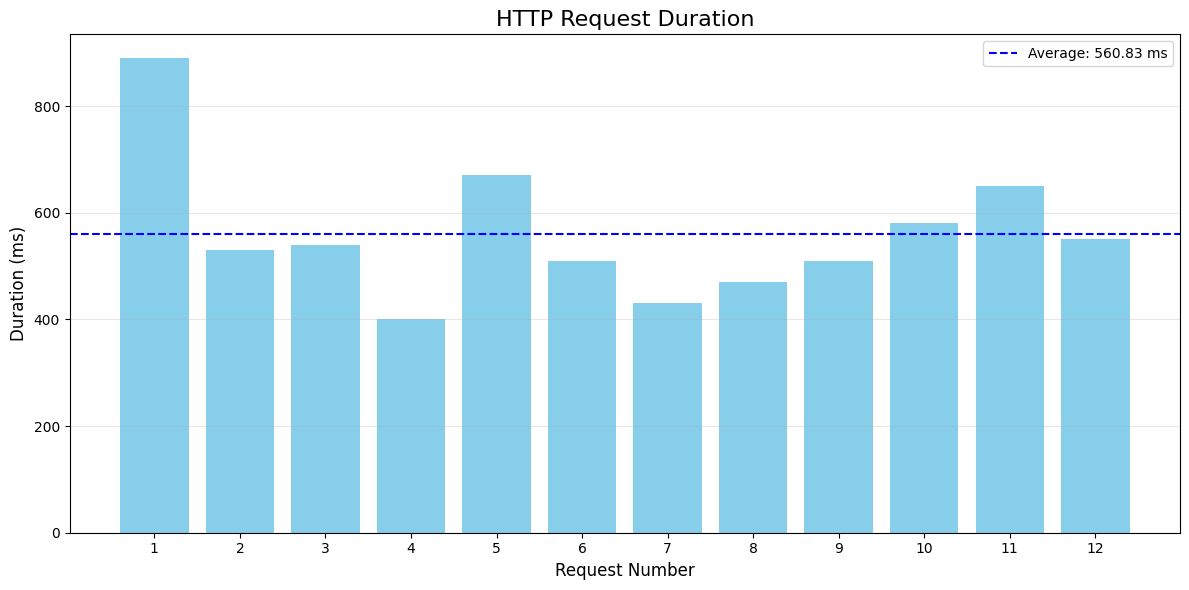

In [26]:
# 3. HTTP Request Duration
# Calculate duration of each HTTP request
http_duration = after_http['timestamp'].values - before_http['timestamp'].values

plt.figure(figsize=(12, 6))
plt.bar(request_number, http_duration, color='skyblue')
plt.axhline(y=np.mean(http_duration), color='blue', linestyle='--', label=f'Average: {np.mean(http_duration):.2f} ms')
plt.title('HTTP Request Duration', fontsize=16)
plt.xlabel('Request Number', fontsize=12)
plt.ylabel('Duration (ms)', fontsize=12)
plt.grid(True, axis='y', alpha=0.3)
plt.legend()
plt.xticks(request_number)
plt.tight_layout()
plt.savefig('memory_analysis_plots/http_request_duration.png', dpi=300)
plt.show()

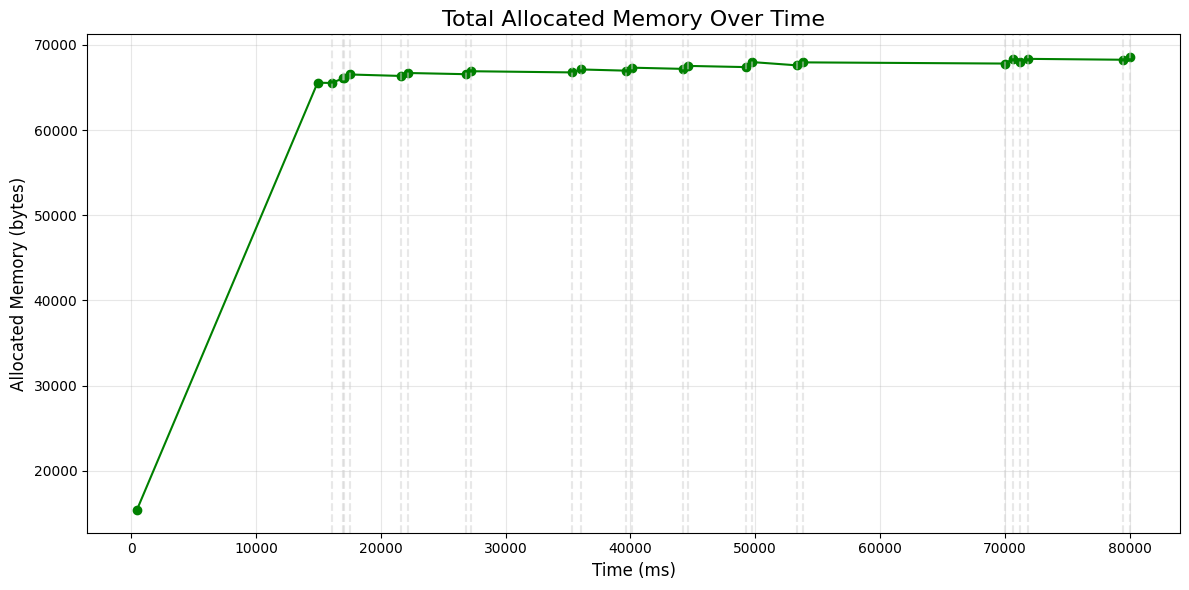

In [28]:
# 4. Memory Allocation Over Time
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['total_allocated_bytes'], marker='o', linestyle='-', color='green')
plt.title('Total Allocated Memory Over Time', fontsize=16)
plt.xlabel('Time (ms)', fontsize=12)
plt.ylabel('Allocated Memory (bytes)', fontsize=12)
plt.grid(True, alpha=0.3)

# Mark HTTP request events
for idx, row in df[df['event'].str.contains('HTTP')].iterrows():
    plt.axvline(x=row['timestamp'], color='lightgray', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.savefig('memory_analysis_plots/memory_analysis_plots.png', dpi=300)
plt.show()

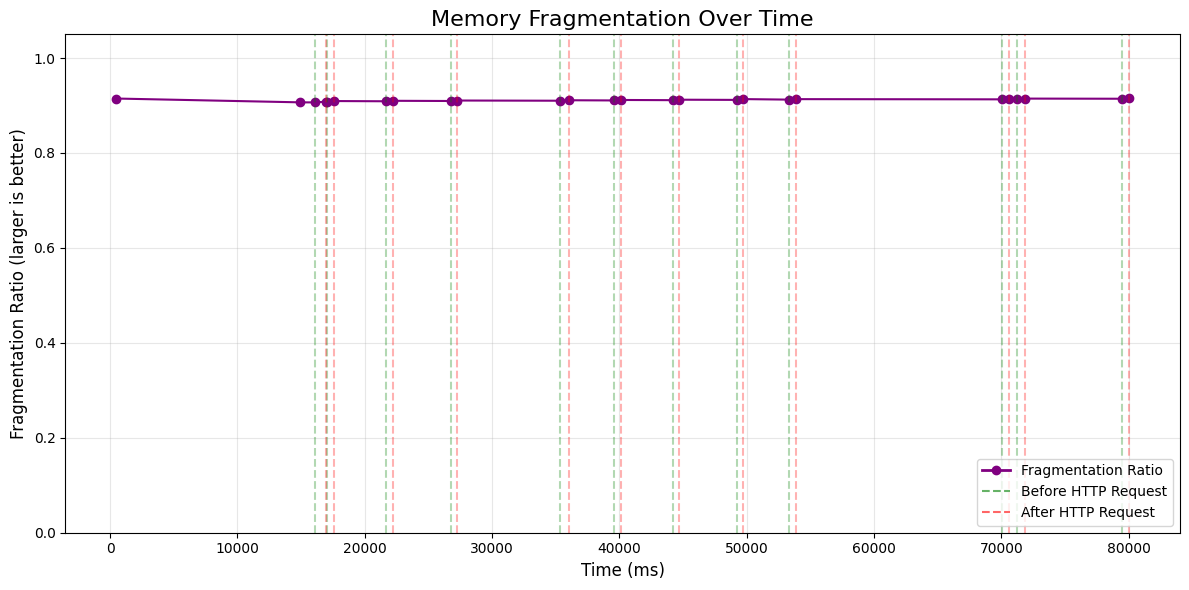

In [33]:
# 5. Memory Fragmentation Analysis
df['fragmentation_ratio'] = df['largest_free_block'] / df['free_heap']

plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['fragmentation_ratio'], marker='o', linestyle='-', color='purple')
plt.title('Memory Fragmentation Over Time', fontsize=16)
plt.xlabel('Time (ms)', fontsize=12)
plt.ylabel('Fragmentation Ratio (larger is better)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.ylim(0, 1.05)

# Mark HTTP request events
before_times = df[df['event'] == 'Before HTTP request']['timestamp']
after_times = df[df['event'] == 'After HTTP request']['timestamp']

for time in before_times:
    plt.axvline(x=time, color='green', linestyle='--', alpha=0.3)
for time in after_times:
    plt.axvline(x=time, color='red', linestyle='--', alpha=0.3)

from matplotlib.lines import Line2D
custom_lines = [
    Line2D([0], [0], color='purple', lw=2, marker='o'),
    Line2D([0], [0], color='green', linestyle='--', alpha=0.6),
    Line2D([0], [0], color='red', linestyle='--', alpha=0.6)
]
plt.legend(custom_lines, ['Fragmentation Ratio', 'Before HTTP Request', 'After HTTP Request'], 
           loc='lower right')
plt.tight_layout()
plt.savefig('memory_analysis_plots/http_memory_fragmentation.png', dpi=300)
plt.show()

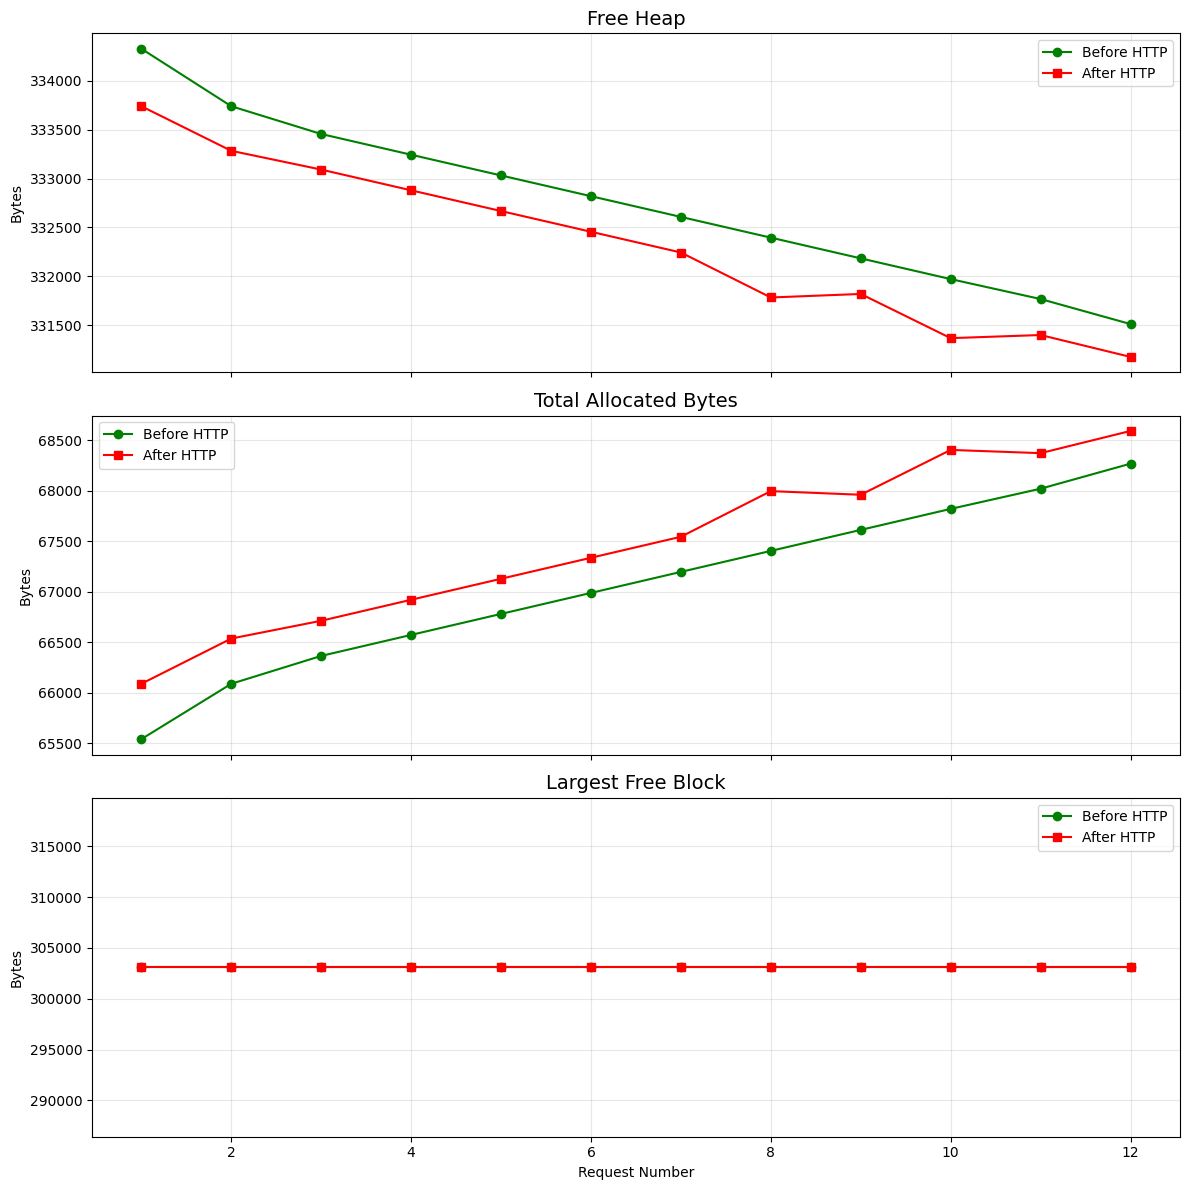

In [32]:
# 6. Before vs After HTTP Request Memory Metrics
metrics = ['free_heap', 'total_allocated_bytes', 'largest_free_block']
fig, axes = plt.subplots(len(metrics), 1, figsize=(12, 12), sharex=True)

for i, metric in enumerate(metrics):
    before_values = before_http[metric].values
    after_values = after_http[metric].values
    
    axes[i].plot(request_number, before_values, 'o-', color='green', label='Before HTTP')
    axes[i].plot(request_number, after_values, 's-', color='red', label='After HTTP')
    axes[i].set_title(f'{metric.replace("_", " ").title()}', fontsize=14)
    axes[i].set_ylabel('Bytes')
    axes[i].grid(True, alpha=0.3)
    axes[i].legend()

axes[-1].set_xlabel('Request Number')
plt.tight_layout()
plt.savefig('memory_analysis_plots/http_before_after_comparison.png', dpi=300)
plt.show()

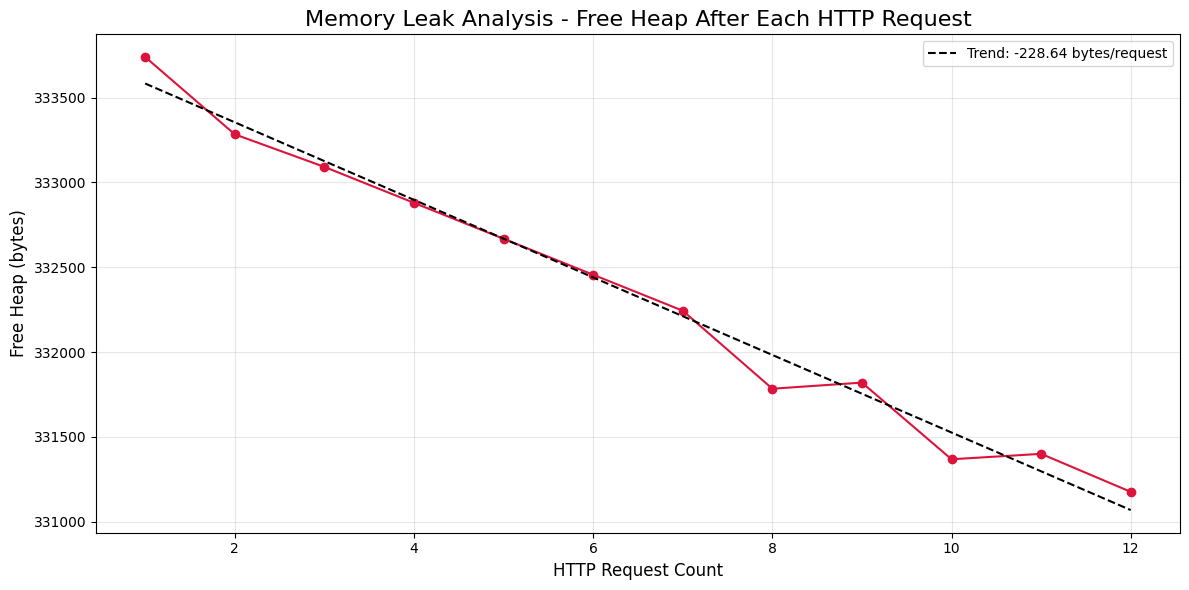

In [37]:
# 7. Memory Leak Visualization
# Create a new dataframe with only the "After HTTP request" events to track cumulative effect
after_requests = df[df['event'] == 'After HTTP request'].reset_index(drop=True)

plt.figure(figsize=(12, 6))
plt.plot(range(1, len(after_requests) + 1), after_requests['free_heap'], 
         marker='o', linestyle='-', color='crimson')

# Add trendline
z = np.polyfit(range(1, len(after_requests) + 1), after_requests['free_heap'], 1)
p = np.poly1d(z)
plt.plot(range(1, len(after_requests) + 1), p(range(1, len(after_requests) + 1)), 
         linestyle='--', color='black', 
         label=f'Trend: {z[0]:.2f} bytes/request')

plt.title('Memory Leak Analysis - Free Heap After Each HTTP Request', fontsize=16)
plt.xlabel('HTTP Request Count', fontsize=12)
plt.ylabel('Free Heap (bytes)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.savefig('memory_analysis_plots/http_memory_leak_analysis.png', dpi=300)
plt.show()

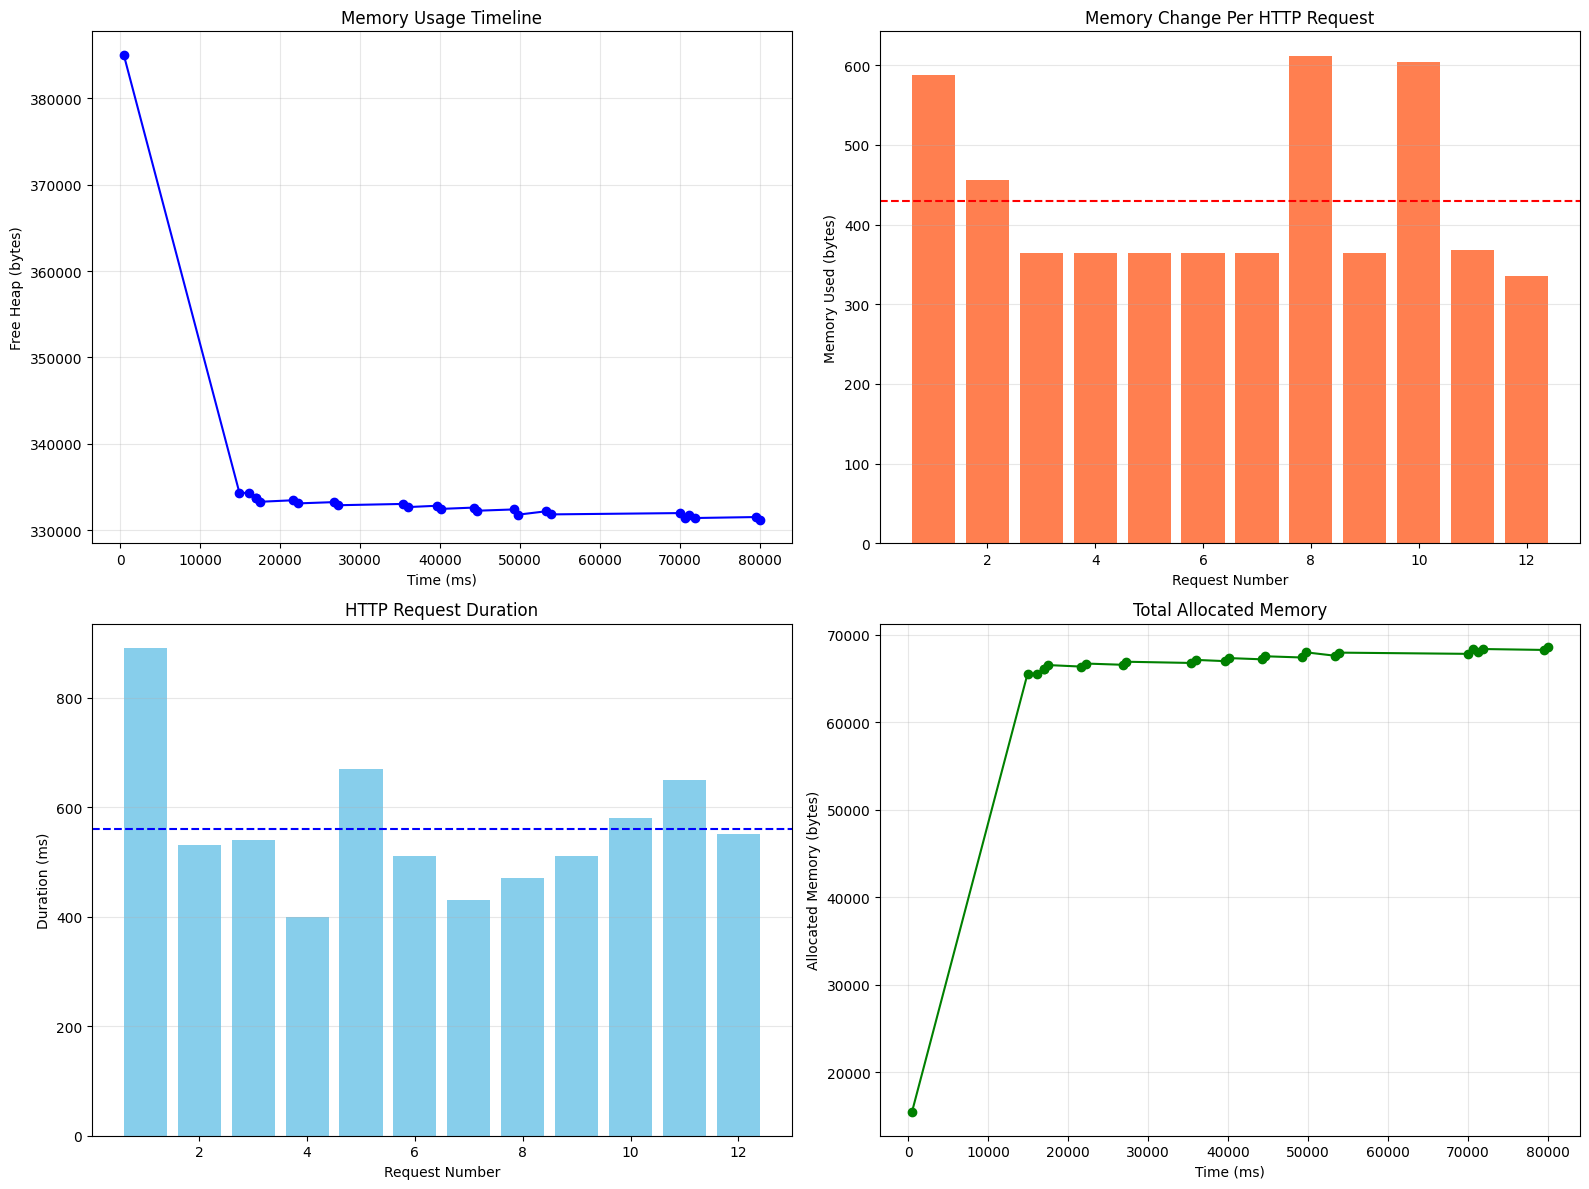

In [36]:
# 8. Create a dashboard of key metrics
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# Memory Timeline
axs[0, 0].plot(df['timestamp'], df['free_heap'], marker='o', linestyle='-', color='blue')
axs[0, 0].set_title('Memory Usage Timeline')
axs[0, 0].set_xlabel('Time (ms)')
axs[0, 0].set_ylabel('Free Heap (bytes)')
axs[0, 0].grid(True, alpha=0.3)

# Memory Allocation
axs[1, 1].plot(df['timestamp'], df['total_allocated_bytes'], marker='o', linestyle='-', color='green')
axs[1, 1].set_title('Total Allocated Memory')
axs[1, 1].set_xlabel('Time (ms)')
axs[1, 1].set_ylabel('Allocated Memory (bytes)')
axs[1, 1].grid(True, alpha=0.3)

# Memory Change Per Request
axs[0, 1].bar(request_number, memory_change, color='coral')
axs[0, 1].axhline(y=np.mean(memory_change), color='red', linestyle='--')
axs[0, 1].set_title('Memory Change Per HTTP Request')
axs[0, 1].set_xlabel('Request Number')
axs[0, 1].set_ylabel('Memory Used (bytes)')
axs[0, 1].grid(True, axis='y', alpha=0.3)

# Request Duration
axs[1, 0].bar(request_number, http_duration, color='skyblue')
axs[1, 0].axhline(y=np.mean(http_duration), color='blue', linestyle='--')
axs[1, 0].set_title('HTTP Request Duration')
axs[1, 0].set_xlabel('Request Number')
axs[1, 0].set_ylabel('Duration (ms)')
axs[1, 0].grid(True, axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('memory_analysis_plots/http_memory_dashboard.png', dpi=300)
plt.show()